In [ ]:
# !pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=efb85f1e2c95d6b9790143bccf7df9bf3b774895a518fdcb7036612ff2927879
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=c68d70f48e380cdfe9441898c2f519f4c7b96639b11e24d1a9849f298b6e9784
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fuzz


In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from scipy.linalg import eig
import seaborn as sns

In [ ]:
def ahp(A):
    n = A.shape[1]
    w = np.zeros((n,))
    for i in range(n):
        s = 0
        for j in range(n):
            s += A[i,j]
        w[i] = s/n
    lambda_max, eig_vector = eig(A)
    eig_vector = eig_vector[:,np.argmax(lambda_max)]
    return eig_vector/np.sum(eig_vector)

In [ ]:
def fuzzy_ahp(A):
    n = A.shape[1]
    w = np.zeros((n,))
    for i in range(n):
        s = 0
        for j in range(n):
            s += A[i,j]
        w[i] = s/n
    r = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            r[i,j] = fuzz.interp_membership(np.arange(0,11,1), fuzz.trimf(np.arange(0,11,1), [A[i,j]-1, A[i,j], A[i,j]+1]), A[i,j])
    w_fuzzy = np.zeros((n,))
    for i in range(n):
        s = 0
        for j in range(n):
            s += r[i,j]*w[j]
        w_fuzzy[i] = s/np.sum(r[i,:])
    return w_fuzzy/np.sum(w_fuzzy)


In [ ]:
data = pd.read_excel("/content/High_Range_Phones.xlsx")
data

,Index,Phone,Ram,Rom,Rear Camera,Display,Battery
0,1,Apple Iphone 14,6,512,12,6.10,3279
1,2,Samsung Galaxy S23,8,512,50,6.10,3900
2,3,One Plus 11,8,512,50,6.70,5000
3,4,Xiaomi 12 Pro,8,256,50,6.73,4600
4,5,google pixel 7 pro,8,512,50,6.70,5000
5,6,realme GT 2 Pro,8,512,50,6.70,5000
6,7,Nokia X30,8,256,50,6.43,4200
7,8,Oppo Reno8 T,8,256,108,6.70,4800


In [ ]:
data.describe()

,Index,Ram,Rom,Rear Camera,Display,Battery
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,4.50000,7.750000,416.000000,52.500000,6.520000,4472.375000
std,2.44949,0.707107,132.492587,26.071331,0.276354,630.729269
min,1.00000,6.000000,256.000000,12.000000,6.100000,3279.000000
25%,2.75000,8.000000,256.000000,50.000000,6.347500,4125.000000
50%,4.50000,8.000000,512.000000,50.000000,6.700000,4700.000000
75%,6.25000,8.000000,512.000000,50.000000,6.700000,5000.000000
max,8.00000,8.000000,512.000000,108.000000,6.730000,5000.000000


In [ ]:
data.isnull().sum()

Index          0
Phone          0
Ram            0
Rom            0
Rear Camera    0
Display        0
Battery        0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        8 non-null      int64  
 1   Phone        8 non-null      object 
 2   Ram          8 non-null      int64  
 3   Rom          8 non-null      int64  
 4   Rear Camera  8 non-null      int64  
 5   Display      8 non-null      float64
 6   Battery      8 non-null      int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 576.0+ bytes


In [ ]:
data2= data.drop('Phone', axis=1)

In [ ]:
data2= data2.drop('Index', axis=1)

In [ ]:
data3= data2.head()

In [ ]:
data3

,Ram,Rom,Rear Camera,Display,Battery
0,6,512,12,6.10,3279
1,8,512,50,6.10,3900
2,8,512,50,6.70,5000
3,8,256,50,6.73,4600
4,8,512,50,6.70,5000


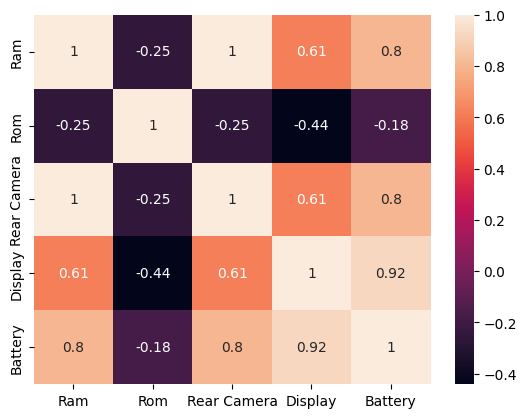

In [ ]:
sns.heatmap(data3.corr(),annot=True);

In [ ]:
ahp_weights = ahp(data3.values)
fuzzy_weights = fuzzy_ahp(data3.values)

print("AHP weights:", ahp_weights)
print("Fuzzy AHP weights:", fuzzy_weights)

AHP weights: [0.15529973 0.18294588 0.2290203  0.2037138  0.2290203 ]
Fuzzy AHP weights: [0.20249371 0.20249371 0.19816159 0.19868941 0.19816159]


In [ ]:
# Therefore:
criteria_weights_ahp = {'Ram': 0.15, 'Rom': 0.18, 'Rear Camera': 0.22,'Display':0.20,'Battery':0.22}
criteria_weights_fuzzy = {'Ram': 0.20, 'Rom': 0.20, 'Rear Camera': 0.19,'Display':0.19,'Battery':0.19}



In [ ]:
alternative_scores = {'Iphone 14': {'Ram': 6, 'Rom': 512, 'Rear Camera': 12,'Display':6.1,'Battery':3279},
                      'Samsung Galaxy S23': {'Ram': 8, 'Rom': 512, 'Rear Camera': 50,'Display':6.1,'Battery':3900},
                      'One Plus 11':{'Ram': 8, 'Rom': 512, 'Rear Camera': 50,'Display':6.7,'Battery':5000},
                      'Xiaomi 12 Pro':{'Ram': 8, 'Rom': 256, 'Rear Camera': 50,'Display':6.73,'Battery':4600},
                      'google pixel 7 pro':{'Ram': 8, 'Rom': 512, 'Rear Camera': 50,'Display':6.7,'Battery':5000},
                      'realme GT 2 Pro':{'Ram': 8, 'Rom': 512, 'Rear Camera': 50,'Display':6.7,'Battery':5000},
                      'Nokia X30':{'Ram': 8, 'Rom': 256, 'Rear Camera': 50,'Display':6.43,'Battery':4200},
                      'Oppo Reno8 T':{'Ram': 8, 'Rom': 256, 'Rear Camera': 108,'Display':6.7,'Battery':4800}}

In [ ]:
# FOR AHP
scores = {}
for alternative in alternative_scores:
    score = 0
    for criterion in alternative_scores[alternative]:
        score += alternative_scores[alternative][criterion] * criteria_weights_ahp[criterion]
    scores[alternative] = score

In [ ]:
print("Scores:", scores)
best_alternative = max(scores, key=scores.get)
print("Best alternative:", best_alternative)


Scores: {'Iphone 14': 818.3, 'Samsung Galaxy S23': 963.58, 'One Plus 11': 1205.7, 'Xiaomi 12 Pro': 1071.626, 'google pixel 7 pro': 1205.7, 'realme GT 2 Pro': 1205.7, 'Nokia X30': 983.566, 'Oppo Reno8 T': 1128.38}
Best alternative: One Plus 11


In [ ]:
import plotly.graph_objects as go

x = list(scores.keys())
y = list(scores.values())
colors = ['blue', 'red', 'green', 'orange', 'purple','white','pink']

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y, marker_color=colors))

fig.update_layout(title="Phones Scores", xaxis_title="Alternative", yaxis_title="Score")

# Display chart
fig.show()







In [ ]:
# By using Fuzzy Ahp:
scores = {}
for alternative in alternative_scores:
    score = 0
    for criterion in alternative_scores[alternative]:
        score += alternative_scores[alternative][criterion] * criteria_weights_fuzzy[criterion]
    scores[alternative] = score


In [ ]:
print("Scores:", scores)
best_alternative = max(scores, key=scores.get)
print("Best alternative:", best_alternative)


Scores: {'Iphone 14': 730.049, 'Samsung Galaxy S23': 855.659, 'One Plus 11': 1064.773, 'Xiaomi 12 Pro': 937.5787, 'google pixel 7 pro': 1064.773, 'realme GT 2 Pro': 1064.773, 'Nokia X30': 861.5217, 'Oppo Reno8 T': 986.593}
Best alternative: One Plus 11


In [ ]:
import plotly.graph_objects as go


x = list(scores.keys())
y = list(scores.values())
colors = ['blue', 'red', 'green', 'orange', 'purple','white','pink']


fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y, marker_color=colors))


fig.update_layout(title="Phones Scores", xaxis_title="Alternative", yaxis_title="Score")

# Display chart
fig.show()
